## Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00
time: 513 µs (started: 2023-01-30 07:50:15 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
np.set_printoptions(threshold=np.inf)
from sklearn.metrics import accuracy_score

In [ ]:
# sample = pd.read_csv('/content/drive/MyDrive/ShapeDetection/Copy of OBJECT_DETECTION_TRAIN_SET.csv')
# # sample_new = sample.sample(frac=1)
# testData =pd.read_csv('/content/drive/MyDrive/ShapeDetection/Copy of OBJECT_DETECTION_VAL_SET.csv')
alldata = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/ALL_DATASET.csv')

sample = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TRAINING_DATA.csv')

testData =pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TEST_DATA.csv')



In [ ]:
alldata= alldata.drop('MASS_kg',axis=1)
# testData= testData.drop('MASS_kg',axis=1)

In [ ]:
X_train= sample.drop('Object_Held', axis=1)
y_train= sample[['Object_Held']]
X_test= testData.drop('Object_Held', axis=1)
y_test= testData[['Object_Held']]

In [ ]:
Xall = alldata.drop('Object_Held', axis=1)

In [ ]:
X_train.columns = sample.columns[:-1]
cols=sample.columns[:-1]

In [ ]:
X_train

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.010445,32.839093,0.796688,32.801138,0.672049,32.598748,0.322165,32.442574,0.086511,45.194791,...,0.453634,57.085112,1.541629,107.008139,0.148899,107.020952,-0.157546,107.005990,0.418681,26.483838
1,0.031048,26.828344,0.550354,26.793490,0.500228,26.617565,0.193967,26.995865,0.013110,59.185006,...,0.158144,16.654109,1.564327,102.981643,-0.051086,103.080865,-0.004866,103.175877,-0.007585,103.668021
2,0.038457,110.567765,0.808517,110.321907,0.440485,109.104348,0.101487,104.691031,0.051087,202.653217,...,0.639911,201.220968,1.496583,363.765022,0.211634,363.553092,-0.418162,362.442545,0.439608,357.595823
3,0.089646,144.278609,0.958439,143.564293,0.244826,140.548777,0.516424,141.254061,0.073867,251.329720,...,0.650024,208.518358,1.518549,456.370160,0.327488,456.375175,-0.392451,456.453786,0.621246,456.896505
4,0.018616,40.906474,0.646382,40.895683,0.411657,40.837607,0.288000,25.540176,0.015417,27.131941,...,0.307123,29.209126,1.543406,98.906924,0.115545,98.891234,0.009058,98.849936,0.095610,98.690772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,0.098011,131.484313,0.433704,127.478153,0.261010,124.598035,0.636805,133.302471,0.079848,136.269939,...,0.220674,11.973770,1.728794,1296.491574,-0.963922,1308.643326,0.411771,1305.174075,-0.268828,1247.196519
103996,-0.207267,29.689574,1.395837,29.627845,0.217758,29.296491,-0.342476,29.341589,0.047683,24.810969,...,0.067794,18.462487,1.564526,68.645733,-0.171600,68.572393,0.188174,68.784507,-0.114198,69.837109
103997,0.012985,9.170545,0.477758,9.073175,0.278467,8.546033,0.172794,8.245469,0.011595,9.970651,...,0.245780,40.719445,1.341691,43.103524,0.047159,43.059404,0.244886,42.996989,-0.000964,42.758392
103998,-0.000092,10.575114,0.756654,10.468608,0.784339,9.891076,0.227583,9.575672,0.000513,10.423315,...,0.289469,13.741549,1.617730,10.880924,0.001656,10.738996,0.085127,10.678098,0.203319,10.538928


In [ ]:
X_train.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,...,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000
mean,0.010377,59.019077,0.757873,58.912398,0.439070,57.599880,0.105654,54.318285,0.017875,73.127612,...,0.343013,73.192579,1.538761,168.922281,0.097913,168.779236,-0.045654,168.651112,0.157913,151.315163
std,0.055551,46.583395,0.270122,46.528936,0.205687,42.997361,0.307863,39.434538,0.040321,104.034816,...,0.299632,72.030838,0.093073,152.145587,0.187873,151.753968,0.243162,151.604452,0.271902,149.612572
min,-0.245457,0.869717,0.150982,0.819148,-0.867079,1.449388,-0.878010,3.215971,-0.170895,3.086973,...,-0.589622,2.924713,0.346626,1.215740,-1.108879,1.435768,-0.493507,1.644472,-0.504787,2.091536
25%,0.001237,27.554567,0.576603,27.540487,0.311816,27.365424,-0.135092,25.684883,0.000031,23.781059,...,0.142518,19.096364,1.526144,66.929315,0.000537,66.907825,-0.292109,66.837465,-0.033042,53.333417
50%,0.014506,44.450103,0.694840,44.443107,0.443937,44.220685,0.168104,43.202844,0.011537,46.745350,...,0.313514,39.722224,1.548317,124.227595,0.099363,124.280676,-0.001013,124.143252,0.104243,93.046680
75%,0.030121,85.215340,0.848801,84.945624,0.597703,83.277963,0.321878,77.314024,0.026729,77.366670,...,0.499017,109.572627,1.588869,243.552500,0.199183,243.772409,0.077355,243.557953,0.353742,226.429805
max,0.302955,630.731861,1.710592,633.479712,1.243738,358.339848,1.044886,358.601367,0.263529,6920.296996,...,1.699928,826.251721,1.730182,2134.194766,1.425054,2137.999104,0.872015,2132.662026,1.820740,2124.201220


In [ ]:
X_test.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,...,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000
mean,0.010750,59.043329,0.757758,58.939814,0.439112,57.506686,0.105795,54.188163,0.017795,72.528570,...,0.342211,73.302435,1.538584,167.856262,0.097469,167.704795,-0.044745,167.645605,0.157781,150.911514
std,0.055664,46.803846,0.270392,46.746137,0.205466,42.772196,0.307529,39.180159,0.040551,87.889941,...,0.298618,72.069633,0.095435,150.242809,0.188040,149.820428,0.243447,149.874731,0.273309,148.928822
min,-0.241188,1.071530,0.169419,0.635060,-0.836450,1.798398,-0.873046,3.142798,-0.170528,0.893441,...,-0.573349,5.331310,0.347416,2.066557,-1.106442,2.232496,-0.491846,1.794654,-0.504623,2.360655
25%,0.001273,27.407552,0.577786,27.371548,0.311367,27.256905,-0.134792,25.567268,-0.000008,23.739231,...,0.140829,19.140674,1.527273,65.961657,0.000206,65.907064,-0.292119,65.865595,-0.034278,52.668712
50%,0.014466,44.667781,0.695022,44.636677,0.443164,44.392968,0.168841,43.425935,0.011527,46.989677,...,0.314293,39.922820,1.548380,124.042660,0.097171,124.070058,0.000109,124.035432,0.103709,93.221167
75%,0.030294,85.008126,0.845948,84.716815,0.597611,82.904280,0.321453,77.025957,0.026684,77.176399,...,0.502240,109.714413,1.589288,243.101599,0.198643,243.212916,0.077913,243.180702,0.353754,225.911573
max,0.303366,544.983063,1.710356,544.175606,1.242769,322.423008,1.032131,322.219117,0.261181,2735.904587,...,1.668118,688.076451,1.722217,1352.028231,1.465783,1361.567870,0.872022,1355.024021,1.820615,1330.888324


In [ ]:
X_test

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.009786,104.351794,0.546490,104.338198,0.384963,104.267620,-0.310730,104.840006,0.013076,57.979368,...,0.390803,105.879330,1.542467,266.063906,0.250837,266.096220,-0.115038,266.091886,0.111861,266.050631
1,0.071798,47.750220,0.875184,47.741112,0.736651,47.693654,0.288597,47.587819,0.053620,50.020249,...,0.670850,99.985989,1.534317,161.109601,0.132790,161.104654,-0.197171,161.140641,0.551562,161.309158
2,0.016403,24.056021,0.607792,24.416491,0.597581,26.951786,0.165221,29.055573,0.003436,58.506011,...,0.337532,41.081555,1.548550,71.098654,0.586026,71.574493,0.028959,69.896322,-0.141075,64.418194
3,0.017546,41.109085,0.648372,41.097631,0.410927,41.036163,0.296264,27.815145,0.014571,25.404348,...,0.318431,28.611590,1.543291,98.536199,0.134482,98.519135,0.009753,98.484929,0.085085,98.355228
4,-0.131836,75.208992,0.802505,74.165394,0.465034,68.509771,0.517057,65.740103,-0.048976,165.847831,...,0.774161,211.228996,1.498319,410.974099,0.222266,410.490621,-0.317619,411.477469,0.766448,396.303329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0.001476,10.744247,0.758046,10.630004,0.784031,10.007535,0.230671,9.677469,0.001163,10.605830,...,0.335339,17.223968,1.614494,14.068160,0.023397,13.984338,0.084325,13.848997,0.204087,8.543576
25996,0.225909,106.884103,0.608045,106.886382,0.530822,106.902916,0.381490,69.542631,0.193205,49.949125,...,0.487840,132.622270,1.523860,234.300511,0.175064,234.293104,-0.275213,234.272760,0.476786,121.220785
25997,0.058375,77.086686,0.715811,76.544435,0.406238,74.036217,0.383465,74.579521,0.058289,116.031860,...,0.678046,125.517225,1.507271,249.579236,0.146511,249.973944,-0.387625,249.615286,0.407653,247.678163
25998,0.005426,28.144848,0.587001,28.182676,0.755417,26.608374,-0.078174,29.637256,0.001609,7.875354,...,0.231841,9.034118,1.582597,43.474422,-0.046180,43.689856,0.078914,43.817078,0.095219,44.234315


## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalar = StandardScaler().fit(X_train)
scalar
X_train= scalar.transform(X_train)


In [ ]:
X_test = scalar.transform(X_test)
X_test= pd.DataFrame(X_test)

In [ ]:
X_train= pd.DataFrame(X_train)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,...,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05
mean,-3.907985e-17,-1.560461e-16,-6.176256e-17,6.784317e-17,-2.022314e-17,-5.260749e-17,-3.019807e-17,-9.701641e-17,1.236618e-17,-1.143017e-16,...,-2.206782e-16,-3.432468e-16,6.843073e-16,7.283063e-17,5.465713e-17,8.786134e-17,-3.672276e-17,1.242083e-16,1.239009e-16,1.844678e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.605402e+00,-1.248291e+00,-2.246745e+00,-1.248546e+00,-6.350220e+00,-1.305912e+00,-3.195149e+00,-1.295883e+00,-4.681675e+00,-6.732455e-01,...,-3.112612e+00,-9.755294e-01,-1.280867e+01,-1.102282e+00,-6.423476e+00,-1.102734e+00,-1.841798e+00,-1.101600e+00,-2.437290e+00,-9.974051e-01
25%,-1.645376e-01,-6.754480e-01,-6.710739e-01,-6.742484e-01,-6.186799e-01,-7.031734e-01,-7.819924e-01,-7.261031e-01,-4.425446e-01,-4.743296e-01,...,-6.691405e-01,-7.510183e-01,-1.355671e-01,-6.703675e-01,-5.183116e-01,-6.712965e-01,-1.013549e+00,-6.715775e-01,-7.022957e-01,-6.549063e-01
50%,7.432692e-02,-3.127519e-01,-2.333536e-01,-3.109755e-01,2.366564e-02,-3.111647e-01,2.028513e-01,-2.818721e-01,-1.571730e-01,-2.535919e-01,...,-9.844896e-02,-4.646692e-01,1.026644e-01,-2.937640e-01,7.715062e-03,-2.932297e-01,1.835833e-01,-2.935803e-01,-1.973862e-01,-3.894644e-01
75%,3.554338e-01,5.623547e-01,3.366195e-01,5.595088e-01,7.712403e-01,5.972042e-01,7.023432e-01,5.831398e-01,2.195885e-01,4.074673e-02,...,5.206536e-01,5.050646e-01,5.383741e-01,4.905208e-01,5.390371e-01,4.941784e-01,5.058735e-01,4.940963e-01,7.202255e-01,5.020634e-01
max,5.266859e+00,1.227295e+01,3.527016e+00,1.234866e+01,3.912128e+00,6.994416e+00,3.050829e+00,7.716194e+00,6.092447e+00,6.581645e+01,...,4.528625e+00,1.045473e+01,2.056687e+00,1.291711e+01,7.064065e+00,1.297646e+01,3.773920e+00,1.295490e+01,6.115577e+00,1.318670e+01


In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.001237,-0.562005,0.143693,-0.561186,1.132695,-0.581460,0.703277,-0.554737,1.702240,-0.268496,...,0.369193,-0.223620,0.030813,-0.406942,0.271385,-0.406965,-0.460160,-0.406620,0.959059,-0.834368
1,0.372108,-0.691038,-0.768247,-0.690303,0.297339,-0.720567,0.286861,-0.692858,-0.118163,-0.134019,...,-0.616987,-0.784924,0.274687,-0.433407,-0.793087,-0.432929,0.167742,-0.431884,-0.608672,-0.318472
2,0.505482,1.106595,0.187486,1.104899,0.006878,1.197858,-0.013534,1.277382,0.823701,1.245028,...,0.990880,1.777419,-0.453176,1.280640,0.605312,1.283491,-1.531943,1.278276,1.036024,1.378772
3,1.426969,1.830265,0.742504,1.819347,-0.944374,1.929172,1.334269,2.204570,1.388670,1.712917,...,1.024632,1.878729,-0.217164,1.889304,1.221976,1.895155,-1.426207,1.898388,1.704054,2.042494
4,0.148327,-0.388823,-0.412745,-0.387217,-0.133276,-0.389846,0.592301,-0.729773,-0.060959,-0.442120,...,-0.119779,-0.610623,0.049905,-0.460189,0.093849,-0.460537,0.225004,-0.460419,-0.229140,-0.351739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,1.577548,1.555610,-1.200091,1.473622,-0.865687,1.558200,1.725295,2.002929,1.537001,0.606938,...,-0.408299,-0.849901,2.041770,7.411156,-5.651900,7.511300,1.881164,7.496669,-1.569477,7.324830
103996,-3.917921,-0.629616,2.361776,-0.629387,-1.075969,-0.658262,-1.455619,-0.633374,0.739273,-0.464430,...,-0.918527,-0.759818,0.276820,-0.659086,-1.434558,-0.660328,0.961618,-0.658735,-1.000774,-0.544596
103997,0.046953,-1.070097,-1.037003,-1.071150,-0.780819,-1.140863,0.218087,-1.168342,-0.155744,-0.607078,...,-0.324508,-0.450825,-2.117389,-0.826967,-0.270153,-0.828449,1.194848,-0.828833,-0.584319,-0.725589
103998,-0.188456,-1.039946,-0.004514,-1.041159,1.678627,-1.109581,0.396054,-1.134610,-0.430595,-0.602727,...,-0.178698,-0.825359,0.848468,-1.038756,-0.512354,-1.041429,0.537837,-1.042013,0.166997,-0.940943


In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,...,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05
mean,-3.907985e-17,-1.560461e-16,-6.176256e-17,6.784317e-17,-2.022314e-17,-5.260749e-17,-3.019807e-17,-9.701641e-17,1.236618e-17,-1.143017e-16,...,-2.206782e-16,-3.432468e-16,6.843073e-16,7.283063e-17,5.465713e-17,8.786134e-17,-3.672276e-17,1.242083e-16,1.239009e-16,1.844678e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.605402e+00,-1.248291e+00,-2.246745e+00,-1.248546e+00,-6.350220e+00,-1.305912e+00,-3.195149e+00,-1.295883e+00,-4.681675e+00,-6.732455e-01,...,-3.112612e+00,-9.755294e-01,-1.280867e+01,-1.102282e+00,-6.423476e+00,-1.102734e+00,-1.841798e+00,-1.101600e+00,-2.437290e+00,-9.974051e-01
25%,-1.645376e-01,-6.754480e-01,-6.710739e-01,-6.742484e-01,-6.186799e-01,-7.031734e-01,-7.819924e-01,-7.261031e-01,-4.425446e-01,-4.743296e-01,...,-6.691405e-01,-7.510183e-01,-1.355671e-01,-6.703675e-01,-5.183116e-01,-6.712965e-01,-1.013549e+00,-6.715775e-01,-7.022957e-01,-6.549063e-01
50%,7.432692e-02,-3.127519e-01,-2.333536e-01,-3.109755e-01,2.366564e-02,-3.111647e-01,2.028513e-01,-2.818721e-01,-1.571730e-01,-2.535919e-01,...,-9.844896e-02,-4.646692e-01,1.026644e-01,-2.937640e-01,7.715062e-03,-2.932297e-01,1.835833e-01,-2.935803e-01,-1.973862e-01,-3.894644e-01
75%,3.554338e-01,5.623547e-01,3.366195e-01,5.595088e-01,7.712403e-01,5.972042e-01,7.023432e-01,5.831398e-01,2.195885e-01,4.074673e-02,...,5.206536e-01,5.050646e-01,5.383741e-01,4.905208e-01,5.390371e-01,4.941784e-01,5.058735e-01,4.940963e-01,7.202255e-01,5.020634e-01
max,5.266859e+00,1.227295e+01,3.527016e+00,1.234866e+01,3.912128e+00,6.994416e+00,3.050829e+00,7.716194e+00,6.092447e+00,6.581645e+01,...,4.528625e+00,1.045473e+01,2.056687e+00,1.291711e+01,7.064065e+00,1.297646e+01,3.773920e+00,1.295490e+01,6.115577e+00,1.318670e+01


In [ ]:
X_trainPCA=copy.deepcopy(X_train)
X_testPCA=copy.deepcopy(X_test)

## KNN

k = sqrt(n)/2 , n= no. of training data points

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=149)
neigh.fit(X_trainPCA, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=149)

time: 398 ms (started: 2023-01-30 07:50:24 +00:00)


In [ ]:
y_ = neigh.predict(X_testPCA)

time: 1min 12s (started: 2023-01-30 07:50:25 +00:00)


In [ ]:
accuracy_score(y_test, y_)

0.989

time: 52.2 ms (started: 2023-01-30 07:51:37 +00:00)


In [ ]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 149,
 'p': 2,
 'weights': 'uniform'}

time: 12.6 ms (started: 2023-01-30 07:51:37 +00:00)


time: 27.2 ms (started: 2023-01-30 07:51:37 +00:00)


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# vector = []

# for i in range(1,25):
#   neigh = KNeighborsClassifier(n_neighbors=i)
#   neigh.fit(X_trainPCA, y_train)

#   y_ = neigh.predict(X_testPCA)

#   vector.append(accuracy_score(y_test, y_))

time: 518 µs (started: 2023-01-30 07:51:38 +00:00)


In [ ]:
# vector

time: 500 µs (started: 2023-01-30 07:51:38 +00:00)


time: 8.5 ms (started: 2023-01-30 07:51:38 +00:00)


## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape = 'ovr', gamma = 'auto', C=5)
clf.fit(X_trainPCA, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, gamma='auto')

time: 14 s (started: 2023-01-30 07:51:38 +00:00)


In [ ]:
y_1= clf.predict(X_testPCA)

time: 5.69 s (started: 2023-01-30 07:51:52 +00:00)


In [ ]:
accuracy_score(y_test, y_1)

0.9973846153846154

time: 37.4 ms (started: 2023-01-30 07:51:57 +00:00)


In [ ]:
clf.get_params()

{'C': 5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

time: 4 ms (started: 2023-01-30 07:51:57 +00:00)


time: 12.7 ms (started: 2023-01-30 07:51:57 +00:00)


## DTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0,min_samples_leaf = 100, max_depth=20)
clf2.fit(X_trainPCA, y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=100, random_state=0)

time: 6.02 s (started: 2023-01-30 07:51:57 +00:00)


In [ ]:
y_2= clf2.predict(X_testPCA)

time: 14.1 ms (started: 2023-01-30 07:52:03 +00:00)


In [ ]:
accuracy_score(y_test, y_2)

0.9809615384615384

time: 41.6 ms (started: 2023-01-30 07:52:03 +00:00)


In [ ]:
clf2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

time: 5.13 ms (started: 2023-01-30 07:52:03 +00:00)


time: 14.6 ms (started: 2023-01-30 07:52:03 +00:00)


## Random Forest

In [ ]:
# y_train= sample[['Object_Held']]

time: 507 µs (started: 2023-01-30 07:52:03 +00:00)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(y_train)
y_train2 = enc.transform(y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_leaf=100, random_state=0)
clf3.fit(X_trainPCA, y_train2)

<ipython-input-35-c9ae7ac95217>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X_trainPCA, y_train2)


RandomForestClassifier(max_depth=20, min_samples_leaf=100, random_state=0)

time: 1min 8s (started: 2023-01-30 07:52:04 +00:00)


In [ ]:
y_3 = clf3.predict(X_testPCA)

time: 500 ms (started: 2023-01-30 07:53:12 +00:00)


In [ ]:
# y_3=pd.DataFrame(y_3)
# y_3

time: 404 µs (started: 2023-01-30 07:53:13 +00:00)


In [ ]:
y_3 = enc.inverse_transform(pd.DataFrame(y_3))

time: 6.42 ms (started: 2023-01-30 07:53:13 +00:00)


In [ ]:
y_3 =pd.DataFrame(y_3)
y_3.columns=['Object_Held']

time: 1.77 ms (started: 2023-01-30 07:53:13 +00:00)


In [ ]:
accuracy_score(y_test, y_3)

0.9958076923076923

time: 40.4 ms (started: 2023-01-30 07:53:13 +00:00)


In [ ]:
clf3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

time: 5.76 ms (started: 2023-01-30 07:53:13 +00:00)


time: 18.8 ms (started: 2023-01-30 07:53:13 +00:00)


time: 28.9 ms (started: 2023-01-30 07:53:13 +00:00)


## Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([keras.layers.Dense(20, input_dim=32,activation ='elu' ), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(13,activation = tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                660       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                4

In [ ]:
history= model.fit(X_train, y_train2,epochs = 10, validation_split=0.2)

Epoch 1/10
2600/2600 [==============================] - 14s 4ms/step - loss: 0.1565 - accuracy: 0.9540 - val_loss: 0.0357 - val_accuracy: 0.9902
Epoch 2/10
2600/2600 [==============================] - 8s 3ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0141 - val_accuracy: 0.9954
Epoch 3/10
2600/2600 [==============================] - 22s 8ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.0098 - val_accuracy: 0.9963
Epoch 4/10
2600/2600 [==============================] - 20s 8ms/step - loss: 0.0161 - accuracy: 0.9942 - val_loss: 0.0111 - val_accuracy: 0.9952
Epoch 5/10
2600/2600 [==============================] - 11s 4ms/step - loss: 0.0133 - accuracy: 0.9951 - val_loss: 0.0134 - val_accuracy: 0.9943
Epoch 6/10
2600/2600 [==============================] - 7s 3ms/step - loss: 0.0127 - accuracy: 0.9953 - val_loss: 0.0091 - val_accuracy: 0.9963
Epoch 7/10
2600/2600 [==============================] - 9s 4ms/step - loss: 0.0113 - accuracy: 0.9956 - val_loss: 0.0097 - val_accur

In [ ]:
_=pd.DataFrame(history.history)

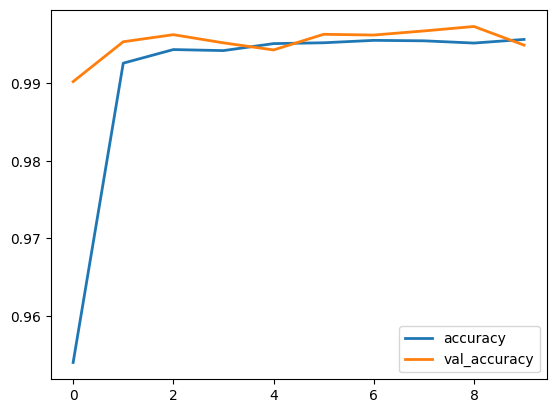

In [ ]:
plt.plot(range(10), _[['accuracy','val_accuracy']], linewidth=2, markersize=1)
plt.legend(['accuracy','val_accuracy'])

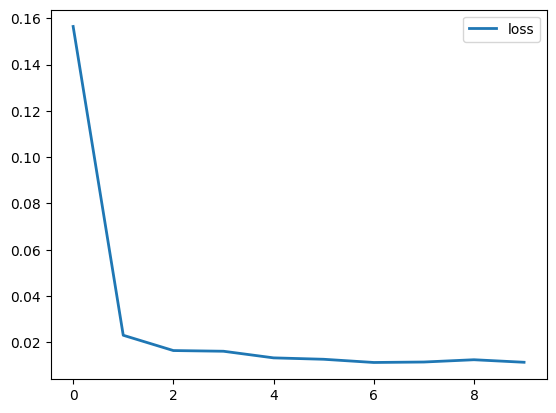

In [ ]:
plt.plot(range(10), _['loss'], linewidth=2, markersize=1)
plt.legend(['loss'])

In [ ]:
y__= model.predict(X_test)

813/813 [==============================] - 1s 2ms/step


In [ ]:
y__.shape

(26000, 13)

In [ ]:
y1= np.zeros((26000,1))
for i in range(len(y__)):
  y1[i]= np.where(y__[i]==max(y__[i]))

<ipython-input-32-722051871be4>:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y1[i]= np.where(y__[i]==max(y__[i]))


In [ ]:
y2=enc.inverse_transform(y1)

In [ ]:
y_pred=pd.DataFrame(y2)
y_pred.columns = ['Object_Held']

In [ ]:
accuracy_score(y_test, y_pred)

0.9948846153846154

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='macro'),"\n")

print(precision_recall_fscore_support(y_test, y_pred, average='micro'),"\n")

print(precision_recall_fscore_support(y_test, y_pred, average='weighted'), "\n")

(0.9949270606364162, 0.9948846153846154, 0.9948783602805041, None) 

(0.9948846153846154, 0.9948846153846154, 0.9948846153846154, None) 

(0.9949270606364161, 0.9948846153846154, 0.9948783602805041, None) 



## CNN

time: 72.2 ms (started: 2023-01-30 07:54:42 +00:00)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.optimizers import SGD
from keras.initializers import random_uniform

time: 1.14 ms (started: 2023-01-30 07:54:42 +00:00)


In [ ]:
# input_dimension = 226
learning_rate = 0.0025
momentum = 0.85
hidden_initializer = random_uniform(seed=42)
dropout_rate = 0.2


time: 1.71 ms (started: 2023-01-30 07:54:42 +00:00)


In [ ]:
model2 = Sequential()
model2.add(Convolution1D(32,1, input_shape=(32,1), activation='relu'))
model2.add(Convolution1D(16,1, activation='relu'))
model2.add(Flatten())
model2.add(Dropout(dropout_rate))
model2.add(Dense(128, input_dim=32, kernel_initializer=hidden_initializer, activation='relu'))
model2.add(Dropout(dropout_rate))
model2.add(Dense(64, kernel_initializer=hidden_initializer, activation='relu'))
model2.add(Dense(13, kernel_initializer=hidden_initializer, activation='softmax'))

time: 126 ms (started: 2023-01-30 07:54:42 +00:00)


In [ ]:
sgd = SGD(lr=learning_rate, momentum=momentum)
model2.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model2.fit(X_train, y_train2, epochs=10,validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2600/2600 [==============================] - 15s 5ms/step - loss: 0.1541 - accuracy: 0.9496 - val_loss: 0.0209 - val_accuracy: 0.9920
Epoch 2/10
2600/2600 [==============================] - 14s 6ms/step - loss: 0.0316 - accuracy: 0.9886 - val_loss: 0.0187 - val_accuracy: 0.9940
Epoch 3/10
2600/2600 [==============================] - 13s 5ms/step - loss: 0.0255 - accuracy: 0.9906 - val_loss: 0.0105 - val_accuracy: 0.9953
Epoch 4/10
2600/2600 [==============================] - 12s 5ms/step - loss: 0.0208 - accuracy: 0.9923 - val_loss: 0.0121 - val_accuracy: 0.9941
Epoch 5/10
2600/2600 [==============================] - 12s 5ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0072 - val_accuracy: 0.9968
Epoch 6/10
2600/2600 [==============================] - 13s 5ms/step - loss: 0.0166 - accuracy: 0.9938 - val_loss: 0.0079 - val_accuracy: 0.9968
Epoch 7/10
2600/2600 [==============================] - 14s 5ms/step - loss: 0.0153 - accuracy: 0.9943 - val_loss: 0.0064 - val_accuracy: 0.9

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 32, 32)            64        
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 16)            528       
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)               

time: 53.5 ms (started: 2023-01-30 07:56:53 +00:00)


In [ ]:
_1=pd.DataFrame(history1.history)

time: 4.73 ms (started: 2023-01-30 07:56:53 +00:00)


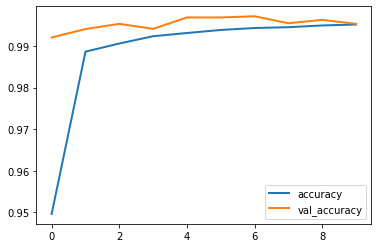

time: 239 ms (started: 2023-01-30 07:56:53 +00:00)


In [ ]:
plt.plot(range(10), _1[['accuracy','val_accuracy']], linewidth=2, markersize=1)
plt.legend(['accuracy','val_accuracy'])

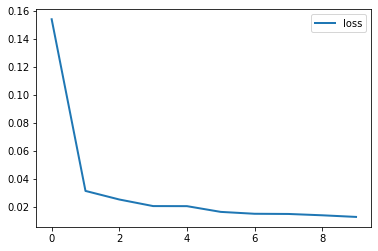

time: 197 ms (started: 2023-01-30 07:56:53 +00:00)


In [ ]:
plt.plot(range(10), _1['loss'], linewidth=2, markersize=1)
plt.legend(['loss'])

In [ ]:
predictions = model2.predict(X_test)

813/813 [==============================] - 1s 2ms/step
time: 1.59 s (started: 2023-01-30 07:56:54 +00:00)


In [ ]:
predictions.shape

(26000, 13)

time: 3.92 ms (started: 2023-01-30 07:56:55 +00:00)


In [ ]:
y1= np.zeros((26000,1))
for i in range(len(predictions)):
  y1[i]= np.where(predictions[i]==max(predictions[i]))

time: 245 ms (started: 2023-01-30 07:56:55 +00:00)


<ipython-input-66-28fd7cb0c11b>:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y1[i]= np.where(predictions[i]==max(predictions[i]))


In [ ]:
y2=enc.inverse_transform(y1)

time: 2.41 ms (started: 2023-01-30 07:56:55 +00:00)


In [ ]:
y_pred=pd.DataFrame(y2)
y_pred.columns = ['Object_Held']

time: 1.23 ms (started: 2023-01-30 07:56:55 +00:00)


In [ ]:
accuracy_score(y_test, y_pred)

0.9948076923076923

time: 43.3 ms (started: 2023-01-30 07:56:55 +00:00)


time: 50.2 ms (started: 2023-01-30 07:56:55 +00:00)


time: 59 ms (started: 2023-01-30 07:56:55 +00:00)


## Ensemble Bagging

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.linear_model import LogisticRegression

# bagging_classifier = BaggingClassifier(LogisticRegression(),n_estimators = 100, bootstrap=True)

time: 501 µs (started: 2023-01-30 07:56:56 +00:00)


In [ ]:
# bagging_classifier.fit(X_trainPCA, y_train)

time: 435 µs (started: 2023-01-30 07:56:56 +00:00)


In [ ]:
# y_2 = bagging_classifier.predict(X_test)

time: 424 µs (started: 2023-01-30 07:56:56 +00:00)


time: 6.75 ms (started: 2023-01-30 07:56:56 +00:00)


time: 13.3 ms (started: 2023-01-30 07:56:56 +00:00)
